### Load Data

In [1]:
!unzip hearth-disease-recognition.zip

Archive:  hearth-disease-recognition.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import numpy as np
import pandas as pd

## Download csv -> Copy to your google drive -> Change to the your file location

data_path = "/content/train.csv"
test_path = "/content/test.csv"
# data_path = "/kaggle/input/hearth-disease-recognition/train.csv"

df = pd.read_csv(data_path)
df_submission = pd.read_csv(test_path)

In [3]:
df.head()

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,Heavy Alcohol Consumption,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day)
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,No,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,No,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,No,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,No,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes
4,train_000005,NaN,Yes,Yes,Yes,34.56,Yes,No,No,Yes,No,Yes,Yes,Very Poor,Yes,Male,Some high school,"$15,000 to less than $20,000",98,Yes


In [4]:
df["History of HeartDisease or Attack"].isnull().sum()

1694

In [5]:
# Drop rows where 'History of HeartDisease or Attack' is null
df = df.dropna(subset=["History of HeartDisease or Attack"])

# Count remaining null values in 'History of HeartDisease or Attack'
null_count = df["History of HeartDisease or Attack"].isnull().sum()

print(f"Remaining null values in 'History of HeartDisease or Attack': {null_count}")

Remaining null values in 'History of HeartDisease or Attack': 0


I think we should try drop it out first.

# 2.2 EDA Data


In [6]:
# Check columns list
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [7]:
# Check data type for each column
df.dtypes

,0
ID,object
History of HeartDisease or Attack,object
High Blood Pressure,object
Told High Cholesterol,object
Cholesterol Checked,object
Body Mass Index,float64
Smoked 100+ Cigarettes,object
Diagnosed Stroke,object
Diagnosed Diabetes,object
Leisure Physical Activity,object


## Dataframe Basic Exploration
| **Function**   | **Description** |
|---------------|---------------|
| `df.describe()` | Summary statistics (count, mean, std, min, max, etc.) |
| `df.mean()`  | Mean (average) of numeric columns |
| `df.median()` | Median of numeric columns |
| `df.std()` | Standard deviation |
| `df.var()` | Variance |
| `df.min()` | Minimum value |
| `df.max()` | Maximum value |
| `df.sum()` | Sum of values |
| `df.count()` | Count of non-null values |
| `df.corr()` | Correlation between numeric columns |
| `df.quantile(0.25)` | 25th percentile (Q1) |
| `df.mode()` | Most frequent value (mode) |

---

In [8]:
# Descriptive statistics
df.describe()

,Body Mass Index,Age
count,209665.000000,221390.000000
mean,28.181723,54.660215
std,6.686984,17.773171
min,11.210000,18.000000
25%,23.870000,42.000000
50%,27.060000,56.000000
75%,31.080000,67.000000
max,98.630000,100.000000


In [9]:
# For each unique, count how many appeared.
df['General Health'].value_counts()

,count
General Health,
Good,77221
Fair,67055
Excellent,40218
Poor,27010
Very Poor,9885


In [10]:
df['Education Level'].value_counts()

,count
Education Level,
College graduate,87903
Some college or technical school,61833
High school graduate,57491
Some high school,9522
Elementary,4404
Never attended school,237


In [11]:
df['Income Level'].value_counts()

,count
Income Level,
"$75,000 or more",73468
"$50,000 to less than $75,000",36831
"$35,000 to less than $50,000",32141
"$25,000 to less than $35,000",23416
"$20,000 to less than $25,000",18864
"$15,000 to less than $20,000",15477
"($10,000 to less than $15,000",10878
"Less than $10,000",10315


## Check Data Balance

In [12]:
df["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
No,203322
Yes,18068


#2.3 Data Cleaning

**Data cleaning** is the process of detecting, correcting, or removing incorrect, incomplete, or irrelevant data from a dataset. This step is crucial for improving data quality before analysis or modeling.

*   Handling missing values
*   Removing duplicates
*   Converting data types
*   Standardizing text format
*   Removing outliers

# 2.4 Feature Engineering


In [13]:
df.keys()

Index(['ID', 'History of HeartDisease or Attack', 'High Blood Pressure',
       'Told High Cholesterol', 'Cholesterol Checked', 'Body Mass Index',
       'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes',
       'Leisure Physical Activity', 'Heavy Alcohol Consumption',
       'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health',
       'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Age',
       'Vegetable or Fruit Intake (1+ per Day)'],
      dtype='object')

In [ ]:
# !pip install --upgrade nltk
# !pip install --upgrade fsspec
# !pip install --upgrade gcsfs

In [14]:
text_columns = []
numeric_columns = []

for col in df.columns:
  if df[col].dtype == 'object':
    text_columns.append(col)
  else:
    numeric_columns.append(col)

print("Text Columns:", text_columns)
print("Numeric Columns:", numeric_columns)

Text Columns: ['ID', 'History of HeartDisease or Attack', 'High Blood Pressure', 'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes', 'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity', 'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier', 'General Health', 'Difficulty Walking', 'Sex', 'Education Level', 'Income Level', 'Vegetable or Fruit Intake (1+ per Day)']
Numeric Columns: ['Body Mass Index', 'Age']


## Label Encoding

* Normal label encoder for income level

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
income_order = ['$75,000 or more', '$50,000 to less than $75,000',
               '$35,000 to less than $50,000', '$25,000 to less than $35,000',
               '$20,000 to less than $25,000', '$15,000 to less than $20,000',
               '($10,000 to less than $15,000', 'Less than $10,000']

# Create a mapping dictionary
income_mapping = {income: i for i, income in enumerate(income_order)}

# Apply the mapping to create a new encoded column
df['Income_Level_Encoded'] = df['Income Level'].map(income_mapping)

df_submission['Income_Level_Encoded'] = df_submission['Income Level'].map(income_mapping)

* Income Level

In [ ]:
# df['Income_Level_TargetEncoded'] = df.groupby('Income Level')['History of HeartDisease or Attack'].transform(lambda x: x.map({'Yes': 1, 'No': 0}).mean())

In [16]:
df.head(5)

,ID,History of HeartDisease or Attack,High Blood Pressure,Told High Cholesterol,Cholesterol Checked,Body Mass Index,Smoked 100+ Cigarettes,Diagnosed Stroke,Diagnosed Diabetes,Leisure Physical Activity,...,Health Care Coverage,Doctor Visit Cost Barrier,General Health,Difficulty Walking,Sex,Education Level,Income Level,Age,Vegetable or Fruit Intake (1+ per Day),Income_Level_Encoded
0,train_000001,No,Yes,Yes,Yes,40.68,Yes,No,No,No,...,Yes,No,Very Poor,Yes,Female,High school graduate,"$15,000 to less than $20,000",64,Yes,5
1,train_000002,No,No,No,No,24.36,Yes,No,No,Yes,...,No,Yes,Fair,No,Female,College graduate,"Less than $10,000",50,No,7
2,train_000003,No,Yes,Yes,Yes,27.33,No,No,No,No,...,Yes,Yes,Very Poor,Yes,Female,High school graduate,"$75,000 or more",61,Yes,0
3,train_000004,No,Yes,No,Yes,27.01,No,No,No,Yes,...,Yes,No,Good,No,Female,Some high school,"$35,000 to less than $50,000",74,Yes,2
5,train_000006,No,Yes,Yes,Yes,25.11,Yes,No,No,Yes,...,Yes,No,Good,No,Male,College graduate,"$75,000 or more",67,Yes,0


* Midpoint Values for income level

In [ ]:
import pandas as pd
import numpy as np

income_mapping = {
    '$75,000 or more': 75000,  # Assuming a reasonable upper bound for this category
    '$50,000 to less than $75,000': 62500,
    '$35,000 to less than $50,000': 42500,
    '$25,000 to less than $35,000': 30000,
    '$20,000 to less than $25,000': 22500,
    '$15,000 to less than $20,000': 17500,
    '($10,000 to less than $15,000': 12500,
    'Less than $10,000': 10000
}

df['Income_Level_Midpoint'] = df['Income Level'].map(income_mapping)

df_submission['Income_Level_Midpoint'] = df_submission['Income Level'].map(income_mapping)

In [17]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['History of HeartDisease or Attack', 'High Blood Pressure', 'Income_Level_Encoded',
                     'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes',
                     'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity',
                     'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier',
                     'General Health', 'Difficulty Walking', 'Sex', 'Education Level',
                    'Vegetable or Fruit Intake (1+ per Day)']

# List of columns to encode
submission_to_encode = ['High Blood Pressure', 'Income_Level_Encoded',
                     'Told High Cholesterol', 'Cholesterol Checked', 'Smoked 100+ Cigarettes',
                     'Diagnosed Stroke', 'Diagnosed Diabetes', 'Leisure Physical Activity',
                     'Heavy Alcohol Consumption', 'Health Care Coverage', 'Doctor Visit Cost Barrier',
                     'General Health', 'Difficulty Walking', 'Sex', 'Education Level',
                    'Vegetable or Fruit Intake (1+ per Day)']

# Loop through the columns and apply Label Encoding
for column in columns_to_encode:
    df[column + '_encoded'] = encoder.fit_transform(df[column])

for column in submission_to_encode:
    df_submission[column + '_encoded'] = encoder.fit_transform(df_submission[column])

In [18]:
df = df.drop(columns=columns_to_encode)
df_submission = df_submission.drop(columns=submission_to_encode)

In [19]:
df

,ID,Body Mass Index,Income Level,Age,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,Smoked 100+ Cigarettes_encoded,...,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,40.68,"$15,000 to less than $20,000",64,0,1,5,1,1,1,...,0,0,0,1,0,4,1,0,2,1
1,train_000002,24.36,"Less than $10,000",50,0,0,7,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2,train_000003,27.33,"$75,000 or more",61,0,1,0,1,1,0,...,0,0,0,1,1,4,1,0,2,1
3,train_000004,27.01,"$35,000 to less than $50,000",74,0,1,2,0,1,0,...,0,1,0,1,0,2,0,0,5,1
5,train_000006,25.11,"$75,000 or more",67,0,1,0,1,1,1,...,0,1,0,1,0,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223079,train_223080,28.20,"$25,000 to less than $35,000",34,0,0,3,0,1,0,...,0,0,0,1,0,0,0,0,0,1
223080,train_223081,45.01,"$50,000 to less than $75,000",43,0,1,1,1,1,0,...,0,0,0,1,0,1,0,1,0,1
223081,train_223082,18.94,"$20,000 to less than $25,000",72,0,1,4,1,1,0,...,1,0,0,1,0,3,1,0,1,0
223082,train_223083,29.29,"($10,000 to less than $15,000",28,0,0,6,0,1,0,...,0,1,0,1,0,0,0,0,4,1


In [20]:
df = df.drop(columns=["Income Level"])
df_submission = df_submission.drop(columns=["Income Level"])

In [21]:
df["History of HeartDisease or Attack_encoded"].unique()

array([0, 1])

In [22]:
df["Income_Level_Encoded_encoded"].unique()

array([5, 7, 0, 2, 4, 6, 1, 3])

In [23]:
from sklearn.preprocessing import StandardScaler

# Assuming 'numeric_columns' list is defined as in your previous code

# numeric_columns = ['Body Mass Index', 'Age', 'Income_Level_TargetEncoded', 'Income_Level_Midpoint_encoded']
numeric_columns = ['Body Mass Index', 'Age']
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_submission[numeric_columns] = scaler.fit_transform(df_submission[numeric_columns])

In [24]:
df.head(5)

,ID,Body Mass Index,Age,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Cholesterol Checked_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Heavy Alcohol Consumption_encoded,Health Care Coverage_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,train_000001,1.869050,0.525500,0,1,5,1,1,1,0,0,0,0,1,0,4,1,0,2,1
1,train_000002,-0.571518,-0.262206,0,0,7,0,0,1,0,0,1,0,0,1,1,0,0,0,0
2,train_000003,-0.127371,0.356706,0,1,0,1,1,0,0,0,0,0,1,1,4,1,0,2,1
3,train_000004,-0.175225,1.088147,0,1,2,0,1,0,0,0,1,0,1,0,2,0,0,5,1
5,train_000006,-0.459360,0.694294,0,1,0,1,1,1,0,0,1,0,1,0,2,0,1,0,1


## Deal with the null values

In [25]:
# Check for null values in the entire DataFrame
null_counts = df.isnull().sum()
print("Null values in each column:\n", null_counts)

Null values in each column:
 ID                                                    0
Body Mass Index                                   11725
Age                                                   0
History of HeartDisease or Attack_encoded             0
High Blood Pressure_encoded                           0
Income_Level_Encoded_encoded                          0
Told High Cholesterol_encoded                         0
Cholesterol Checked_encoded                           0
Smoked 100+ Cigarettes_encoded                        0
Diagnosed Stroke_encoded                              0
Diagnosed Diabetes_encoded                            0
Leisure Physical Activity_encoded                     0
Heavy Alcohol Consumption_encoded                     0
Health Care Coverage_encoded                          0
Doctor Visit Cost Barrier_encoded                     0
General Health_encoded                                0
Difficulty Walking_encoded                            0
Sex_encoded        

## 2.4.2 Predict the Missing BMI

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# 1. Prepare the data
df_train = df[df['Body Mass Index'].notnull()]
# X = df_train[['Age', 'Sex_encoded', 'High Blood Pressure_encoded', 'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded', 'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded', 'History of HeartDisease or Attack_encoded']]
X = df_train[['Age', 'Income_Level_Encoded_encoded',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded']]

y = df_train['Body Mass Index']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 2. Choose and train a model (Linear Regression)
model = RandomForestRegressor(random_state=42)

# The rest of the code remains the same
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.925356837962713


In [38]:
feature_importances = model.feature_importances_

# Sort feature importances in descending order
sorted_feature_importances = sorted(zip(X_train.columns, feature_importances), key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature_name, importance in sorted_feature_importances:
    print(f"{feature_name}: {importance}")


Age: 0.3781402839059794
Sex_encoded: 0.03921859985029325
High Blood Pressure_encoded: 0.28280033078007644
Told High Cholesterol_encoded: 0.05924053869782351
Cholesterol Checked_encoded: 0.020869785463440566
Diagnosed Stroke_encoded: 0.0337380113896574
Diagnosed Diabetes_encoded: 0.15175322596587928
History of HeartDisease or Attack_encoded: 0.03423922394685012


In [40]:
print(y_pred_val)

[ 0.00286226 -0.4583657   0.4515871  ... -0.30814476 -0.25562113
  0.00466193]


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

# Replace Linear Regression with Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# The rest of the code remains the same
model.fit(X_train, y_train)
y_pred_val = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error: {mse}")

print(y_pred_val)

Mean Squared Error: 0.8427877167341642
[ 0.09264024 -0.45076606  0.1840313  ... -0.0859927  -0.32000299
  0.01162843]


In [42]:
y_pred_val

array([ 0.04894717, -0.46235477,  0.40456866, ..., -0.26153568,
       -0.20373936,  0.02246688])

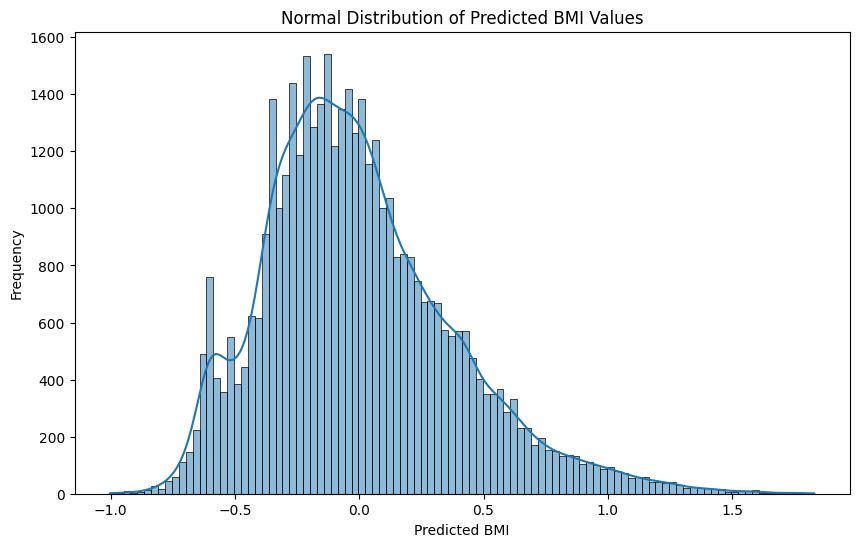

In [46]:
# prompt: Plot to see the normal distribution of the y_pred_val

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred_val is defined as in your previous code
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_val, kde=True)  # kde=True adds a kernel density estimate
plt.title('Normal Distribution of Predicted BMI Values')
plt.xlabel('Predicted BMI')
plt.ylabel('Frequency')
plt.show()

In [47]:
# 4. Predict missing BMI values
df_missing = df[df['Body Mass Index'].isnull()]
# X_missing = df_missing[['Age', 'Sex_encoded', 'High Blood Pressure_encoded', 'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded', 'Diagnosed Stroke_encoded', 'Diagnosed Diabetes_encoded', 'History of HeartDisease or Attack_encoded']]

X_missing = df_missing[['Age', 'Income_Level_Encoded_encoded',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded']]

predicted_bmi = model.predict(X_missing)

# Replace missing values in the original DataFrame
df.loc[df['Body Mass Index'].isnull(), 'Body Mass Index'] = predicted_bmi

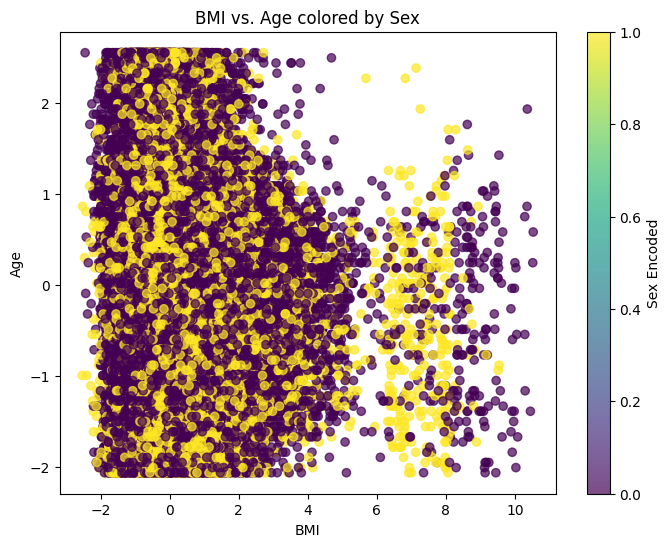

In [48]:
# prompt: Plot the graph between BMI, age and 'sex_encoded'

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'BMI', 'age', and 'sex_encoded' columns

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Body Mass Index'], df['Age'], c=df['Sex_encoded'], cmap='viridis', alpha=0.7)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs. Age colored by Sex')
plt.colorbar(label='Sex Encoded')
plt.show()

# 2.5 Model Training

In [49]:
df.keys()

Index(['ID', 'Body Mass Index', 'Age',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Income_Level_Encoded_encoded',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded'],
      dtype='object')

## Balance Data

In [ ]:
# from imblearn.over_sampling import SMOTE

# # Apply SMOTE to oversample the minority class
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Check the class distribution after resampling
# print(y_train_resampled.value_counts())

diabetes
0    73203
1    73203
Name: count, dtype: int64


In [50]:
keyschosen = ['Body Mass Index', 'Age',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Income_Level_Encoded_encoded',
       'Told High Cholesterol_encoded', 'Cholesterol Checked_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Heavy Alcohol Consumption_encoded', 'Health Care Coverage_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded']

In [51]:
df_chosen_test = df[keyschosen]
df_chosen_test.head()

X_forest = df_chosen_test.drop('History of HeartDisease or Attack_encoded', axis=1)
y_forest = df_chosen_test['History of HeartDisease or Attack_encoded']

X_train, X_test, y_train, y_test = train_test_split(X_forest, y_forest, test_size=0.2, random_state=42)

## Training

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for feature_name, importance in zip(X_train.columns, feature_importances):
  print(f"{feature_name}: {importance}")

Body Mass Index: 0.2949749441315328
Age: 0.21563517010310768
High Blood Pressure_encoded: 0.028717258047532036
Income_Level_Encoded_encoded: 0.09739132572321373
Told High Cholesterol_encoded: 0.02509781884076422
Cholesterol Checked_encoded: 0.0074550611605455645
Smoked 100+ Cigarettes_encoded: 0.01967686008063314
Diagnosed Stroke_encoded: 0.0286589907833998
Diagnosed Diabetes_encoded: 0.02037904779409395
Leisure Physical Activity_encoded: 0.026316276369114187
Heavy Alcohol Consumption_encoded: 0.008555611751303519
Health Care Coverage_encoded: 0.008172861738251295
Doctor Visit Cost Barrier_encoded: 0.015382649670375502
General Health_encoded: 0.06912559090376842
Difficulty Walking_encoded: 0.02469968946626143
Sex_encoded: 0.022991789408701665
Education Level_encoded: 0.0663425844217167
Vegetable or Fruit Intake (1+ per Day)_encoded: 0.02042646960568435


In [53]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                                           Feature  Importance
0                                  Body Mass Index    0.294975
1                                              Age    0.215635
3                     Income_Level_Encoded_encoded    0.097391
13                          General Health_encoded    0.069126
16                         Education Level_encoded    0.066343
2                      High Blood Pressure_encoded    0.028717
7                         Diagnosed Stroke_encoded    0.028659
9                Leisure Physical Activity_encoded    0.026316
4                    Told High Cholesterol_encoded    0.025098
14                      Difficulty Walking_encoded    0.024700
15                                     Sex_encoded    0.022992
17  Vegetable or Fruit Intake (1+ per Day)_encoded    0.020426
8                       Diagnosed Diabetes_encoded    0.020379
6                   Smoked 100+ Cigarettes_encoded    0.019677
12               Doctor Visit Cost Barrier_encoded    0

```10               Heavy Alcohol Consumption_encoded    0.008689
11                    Health Care Coverage_encoded    0.008095
5                      Cholesterol Checked_encoded    0.007476```

Try removing and see again `Cholesterol Checked_encoded, Health Care Coverage_encoded, and Heavy Alcohol Consumption_encoded`

Round two - ` Vegetable or Fruit Intake (1+ per Day)_encoded   
            , Doctor Visit Cost Barrier_encoded    `

Round three - `Diagnosed Diabetes_encoded , Smoked 100+ Cigarettes_encoded  `

- Heavy Alcohol Consumption_encoded (0.008606)
- Cholesterol Checked_encoded (0.008141)
- Health Care Coverage_encoded (0.007131)
- Doctor Visit Cost Barrier_encoded (0.014146)
- Sex_encoded (0.017645)
- High Blood Pressure_encoded (0.017945)
- Vegetable or Fruit Intake (1+ per Day)_encoded (0.019812)

---

# Model Training

We need to drop the table here

In [69]:
keyschosen = ['Body Mass Index', 'Age',
       'History of HeartDisease or Attack_encoded',
       'High Blood Pressure_encoded', 'Income_Level_Encoded_encoded',
       'Told High Cholesterol_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded'
             #  'Heavy Alcohol Consumption_encoded',
      #  'Health Care Coverage_encoded',
      #  'Cholesterol Checked_encoded'
       ]
df_chosen = df[keyschosen]
df_chosen.head()

,Body Mass Index,Age,History of HeartDisease or Attack_encoded,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,1.869050,0.525500,0,1,5,1,1,0,0,0,0,4,1,0,2,1
1,-0.571518,-0.262206,0,0,7,0,1,0,0,1,1,1,0,0,0,0
2,-0.127371,0.356706,0,1,0,1,0,0,0,0,1,4,1,0,2,1
3,-0.175225,1.088147,0,1,2,0,0,0,0,1,0,2,0,0,5,1
5,-0.459360,0.694294,0,1,0,1,1,0,0,1,0,2,0,1,0,1


In [55]:
subkeyschosen =['Body Mass Index', 'Age',
       'High Blood Pressure_encoded', 'Income_Level_Encoded_encoded',
       'Told High Cholesterol_encoded',
       'Smoked 100+ Cigarettes_encoded', 'Diagnosed Stroke_encoded',
       'Diagnosed Diabetes_encoded', 'Leisure Physical Activity_encoded',
       'Doctor Visit Cost Barrier_encoded', 'General Health_encoded',
       'Difficulty Walking_encoded', 'Sex_encoded', 'Education Level_encoded',
       'Vegetable or Fruit Intake (1+ per Day)_encoded',
      #  'Heavy Alcohol Consumption_encoded',
      #  'Health Care Coverage_encoded',
      #  'Cholesterol Checked_encoded'
       ]
df_submission_chosen = df_submission[subkeyschosen]

In [56]:
df_submission_chosen.head()

,Body Mass Index,Age,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,-0.539876,0.807178,1,4,1,0,0,0,1,0,2,0,0,4,1
1,0.102688,0.199267,1,1,0,1,0,0,0,0,1,0,0,0,0
2,1.034708,0.564014,1,7,1,1,0,0,0,0,1,1,0,4,1
3,-0.548969,-0.469436,0,1,0,1,0,0,0,0,1,0,0,4,1
4,-0.126150,-1.077348,0,3,0,1,0,0,0,0,1,0,1,4,1


## Undersampling

In [70]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target variable (y)
X = df.drop(columns=['History of HeartDisease or Attack_encoded'], axis=1)
X = X.drop(columns=[#'Income Level',
                    'Cholesterol Checked_encoded',
                    'Heavy Alcohol Consumption_encoded',
                    'Health Care Coverage_encoded'
                    ], axis=1)
y = df['History of HeartDisease or Attack_encoded']

In [ ]:
# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['History of HeartDisease or Attack_encoded'] = y_resampled

In [59]:
df_balanced['History of HeartDisease or Attack_encoded'].value_counts()

,count
History of HeartDisease or Attack_encoded,
0,18068
1,18068


In [60]:
from sklearn.model_selection import train_test_split

# Assuming X_resampled and y_resampled are defined as in your previous code

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, shuffle=True
)


In [61]:
len(X_train)
y_train.value_counts()

,count
History of HeartDisease or Attack_encoded,
1,14454
0,14454


SMOTE (Oversampling) + ENN

In [72]:
# prompt: Doing the SMOTE + ENN to deal with imbalanced dataset

import pandas as pd
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=42)

# Resample the data
X_resampled, y_resampled = smote_enn.fit_resample(X.drop(columns=['ID'], errors='ignore'), y) # Drop the 'ID' column

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['History of HeartDisease or Attack_encoded'] = y_resampled

# Check the class distribution after resampling
print(df_balanced['History of HeartDisease or Attack_encoded'].value_counts())

History of HeartDisease or Attack_encoded
1    183770
0    156558
Name: count, dtype: int64


In [74]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True
)

print(len(X_train))
print(y_train.value_counts())


238229
History of HeartDisease or Attack_encoded
1    128557
0    109672
Name: count, dtype: int64


In [ ]:
# # List of features to drop
# features_to_drop = ['Heavy Alcohol Consumption_encoded', 'Cholesterol Checked_encoded',
#                     'Health Care Coverage_encoded', 'Doctor Visit Cost Barrier_encoded',
#                     'Sex_encoded', 'High Blood Pressure_encoded',
#                     'Vegetable or Fruit Intake (1+ per Day)_encoded']

# # Drop the features from X
# X = X.drop(columns=features_to_drop)

## 3.2 AutoGluon

In [ ]:
# !pip install -U pip
# !pip install -U setuptools wheel
!pip install autogluon

In [77]:
from autogluon.tabular import TabularPredictor

# Combine features and target for AutoGluon
train_data = X_train.copy()
train_data['History of HeartDisease or Attack_encoded'] = y_train

test_data = X_test.copy()
test_data['History of HeartDisease or Attack_encoded'] = y_test

# Define the label column
label_column = 'History of HeartDisease or Attack_encoded'

# Create and train the AutoGluon predictor
predictor = TabularPredictor(label=label_column).fit(train_data, excluded_model_types=['NN_TORCH'])

No path specified. Models will be saved in: "AutogluonModels/ag-20250215_080025"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.65 GB / 12.67 GB (68.2%)
Disk Space Avail:   69.38 GB / 107.72 GB (64.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions a

[1000]	valid_set's binary_error: 0.0612


	0.9392	 = Validation score   (accuracy)
	27.05s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9248	 = Validation score   (accuracy)
	106.11s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9264	 = Validation score   (accuracy)
	123.15s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: CatBoost ...
	0.9388	 = Validation score   (accuracy)
	53.21s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9196	 = Validation score   (accuracy)
	59.8s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9128	 = Validation score   (accuracy)
	61.82s	 = Training   runtime
	0.24s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.88	 = Validation score   (accuracy)
	177.94s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	0.9036	 = Validation score   (accuracy)
	10.64s	 = Training   runtime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [78]:
from sklearn.metrics import classification_report

# Evaluate the predictor
leaderboard = predictor.leaderboard(test_data)
print(leaderboard)

# Predict on test data
y_pred = predictor.predict(test_data)
print(classification_report(y_test,y_pred))

                  model  score_test  score_val eval_metric  pred_time_test  \
0   WeightedEnsemble_L2    0.946082     0.9480    accuracy       25.158281   
1              LightGBM    0.942948     0.9392    accuracy        7.707972   
2              CatBoost    0.937610     0.9388    accuracy        0.146477   
3      RandomForestGini    0.935660     0.9248    accuracy        6.259168   
4      RandomForestEntr    0.935641     0.9264    accuracy        7.807181   
5         LightGBMLarge    0.935288     0.9340    accuracy        1.740065   
6        ExtraTreesGini    0.924123     0.9196    accuracy        5.427270   
7        ExtraTreesEntr    0.920332     0.9128    accuracy        7.180281   
8               XGBoost    0.910979     0.9036    accuracy        1.489192   
9       NeuralNetFastAI    0.885131     0.8800    accuracy        1.021343   
10       KNeighborsDist    0.879284     0.8704    accuracy        9.381951   
11       KNeighborsUnif    0.873172     0.8600    accuracy      

In [ ]:
# Save the predictor
predictor.save('/content/drive/MyDrive/autogluon_model')

In [79]:
df_submission_chosen.head()

,Body Mass Index,Age,High Blood Pressure_encoded,Income_Level_Encoded_encoded,Told High Cholesterol_encoded,Smoked 100+ Cigarettes_encoded,Diagnosed Stroke_encoded,Diagnosed Diabetes_encoded,Leisure Physical Activity_encoded,Doctor Visit Cost Barrier_encoded,General Health_encoded,Difficulty Walking_encoded,Sex_encoded,Education Level_encoded,Vegetable or Fruit Intake (1+ per Day)_encoded
0,-0.539876,0.807178,1,4,1,0,0,0,1,0,2,0,0,4,1
1,0.102688,0.199267,1,1,0,1,0,0,0,0,1,0,0,0,0
2,1.034708,0.564014,1,7,1,1,0,0,0,0,1,1,0,4,1
3,-0.548969,-0.469436,0,1,0,1,0,0,0,0,1,0,0,4,1
4,-0.126150,-1.077348,0,3,0,1,0,0,0,0,1,0,1,4,1


In [80]:
from sklearn.metrics import classification_report

# Predict on the submission data
df_submission_predictions = predictor.predict(df_submission_chosen)

In [81]:
# Create a list of formatted IDs
num_rows = len(df_submission_predictions)
formatted_ids = [f'test_{i:06}' for i in range(1, num_rows + 1)]

# Create a submission DataFrame with formatted IDs
submission_df = pd.DataFrame({'ID': formatted_ids,
                             'History of HeartDisease or Attack': df_submission_predictions})

mapping = {0: 'No', 1: 'Yes'}
submission_df['History of HeartDisease or Attack'] = submission_df['History of HeartDisease or Attack'].map(mapping)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('old_way_smotenn.csv', index=False)

In [82]:
submission_df["History of HeartDisease or Attack"].value_counts()

,count
History of HeartDisease or Attack,
Yes,53534
No,20827


In [ ]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_2.csv', index=False)